In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [83]:
pd.set_option('display.max_columns', 500)
df = pd.read_csv('/Users/chriskersov/Desktop/ev-charging-analysis/ev_charging_patterns.csv')
df.head(10)

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.000000,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.000000,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.000000,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.000000,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.000000,Level 1,Long-Distance Traveler
5,User_6,Nissan Leaf,50.000000,Station_335,San Francisco,2024-01-01 05:00:00,2024-01-01 07:10:00,43.181137,1.167640,14.334523,36.900341,Evening,Saturday,75.217748,71.982288,143.680046,-5.274218,0.000000,DC Fast Charger,Long-Distance Traveler
6,User_7,Chevy Bolt,85.000000,Station_162,Houston,2024-01-01 06:00:00,2024-01-01 07:53:00,36.862140,3.539619,26.185188,22.214225,Evening,Friday,60.751781,70.796097,81.338009,27.551335,4.000000,Level 2,Commuter
7,User_8,Chevy Bolt,75.000000,Station_302,Los Angeles,2024-01-01 07:00:00,2024-01-01 10:42:00,51.467617,2.655396,26.702908,9.796821,Afternoon,Monday,56.201703,63.786815,116.543166,-4.417460,0.000000,Level 2,Long-Distance Traveler
8,User_9,Chevy Bolt,62.000000,Station_493,Los Angeles,2024-01-01 08:00:00,2024-01-01 09:21:00,43.592372,1.724204,14.294923,32.465005,Evening,Wednesday,33.466200,92.961421,208.259742,22.516706,4.000000,Level 1,Commuter
9,User_10,Hyundai Kona,50.000000,Station_452,Chicago,2024-01-01 09:00:00,2024-01-01 12:44:00,78.868607,2.026875,11.761000,21.312302,Morning,Wednesday,27.399455,70.053381,54.006309,27.512019,2.830381,DC Fast Charger,Commuter


In [84]:
!ls -GFlash ev_charging_patterns.csv

728 -rw-r--r--  1 chriskersov  staff   362K Aug 14 18:52 ev_charging_patterns.csv


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [86]:
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


In [87]:
df.isnull().sum()

User ID                                      0
Vehicle Model                                0
Battery Capacity (kWh)                       0
Charging Station ID                          0
Charging Station Location                    0
Charging Start Time                          0
Charging End Time                            0
Energy Consumed (kWh)                       66
Charging Duration (hours)                    0
Charging Rate (kW)                          66
Charging Cost (USD)                          0
Time of Day                                  0
Day of Week                                  0
State of Charge (Start %)                    0
State of Charge (End %)                      0
Distance Driven (since last charge) (km)    66
Temperature (°C)                             0
Vehicle Age (years)                          0
Charger Type                                 0
User Type                                    0
dtype: int64

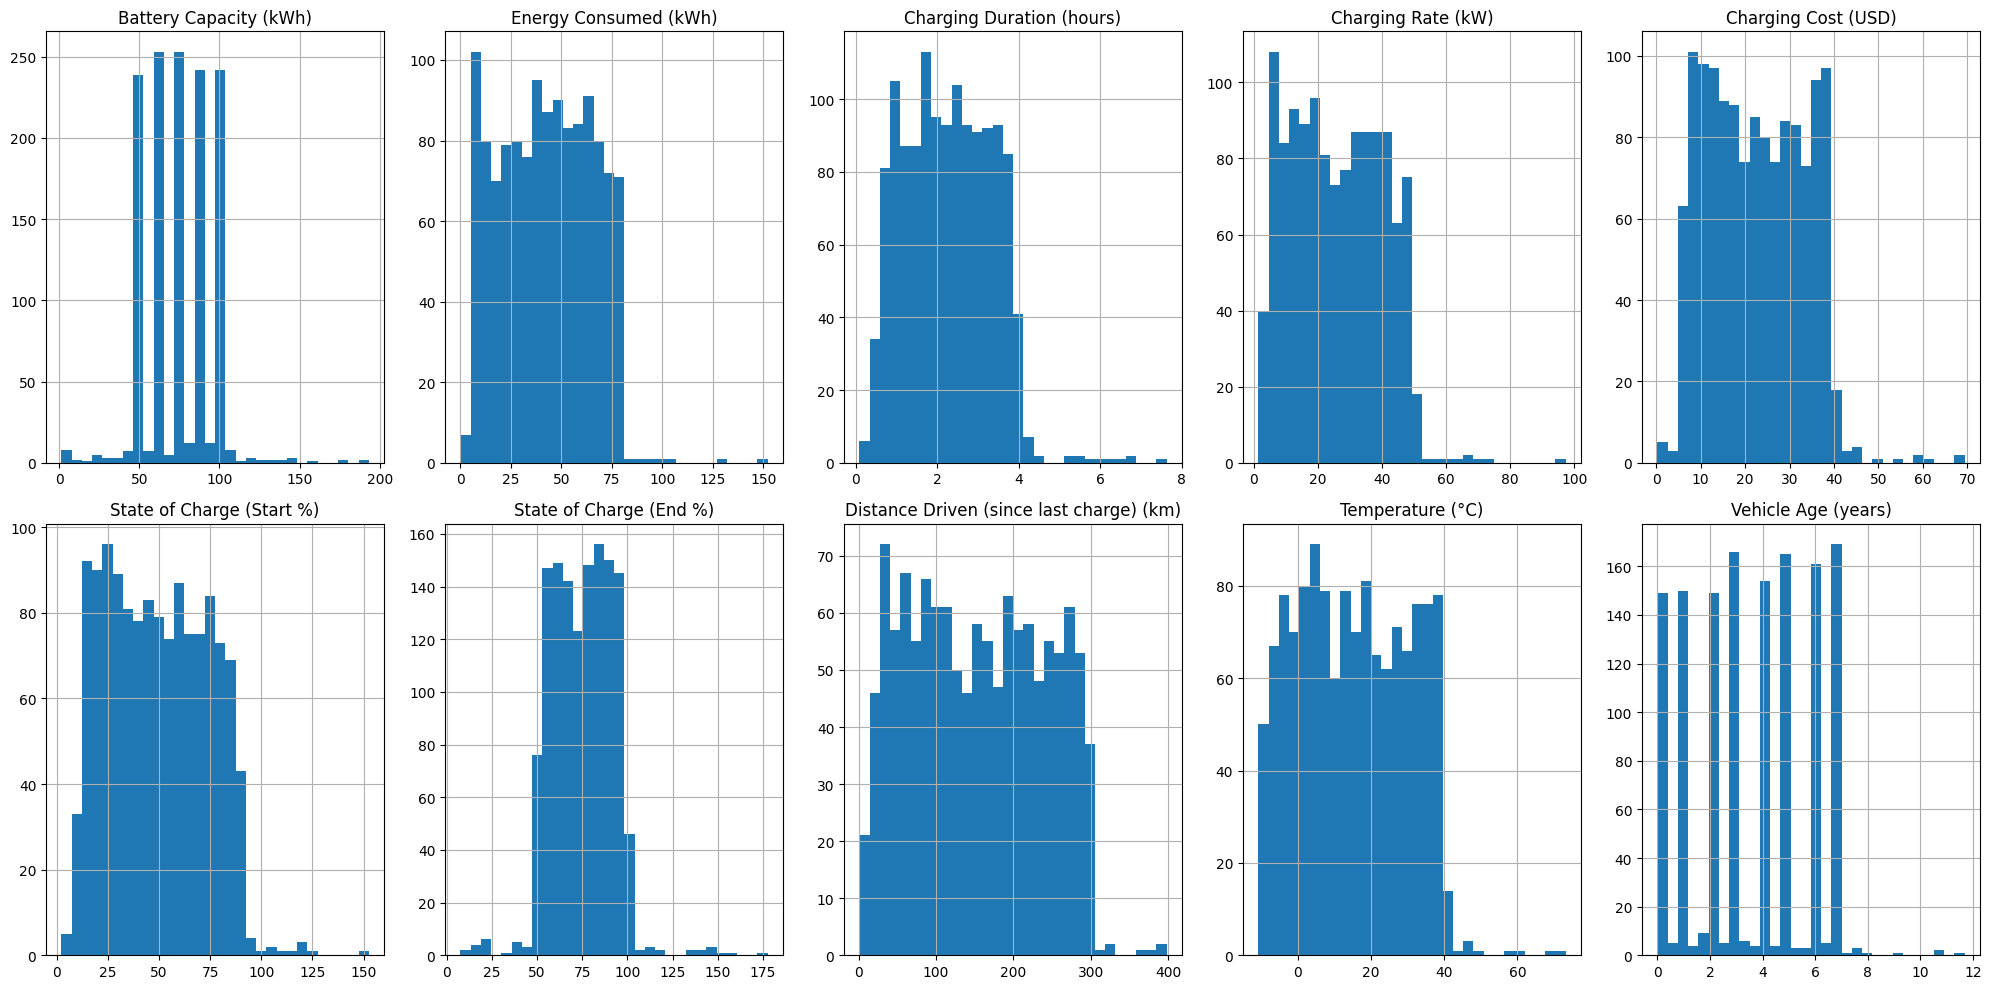

In [88]:
numerical_cols = [
    'Battery Capacity (kWh)', 
    'Energy Consumed (kWh)',
    'Charging Duration (hours)', 
    'Charging Rate (kW)',
    'Charging Cost (USD)',
    'State of Charge (Start %)', 
    'State of Charge (End %)',
    'Distance Driven (since last charge) (km)',
    'Temperature (°C)',
    'Vehicle Age (years)'
]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, col in enumerate(numerical_cols):
    df[col].hist(bins=30, ax=axes[i//5, i%5])
    axes[i//5, i%5].set_title(col)
plt.tight_layout()

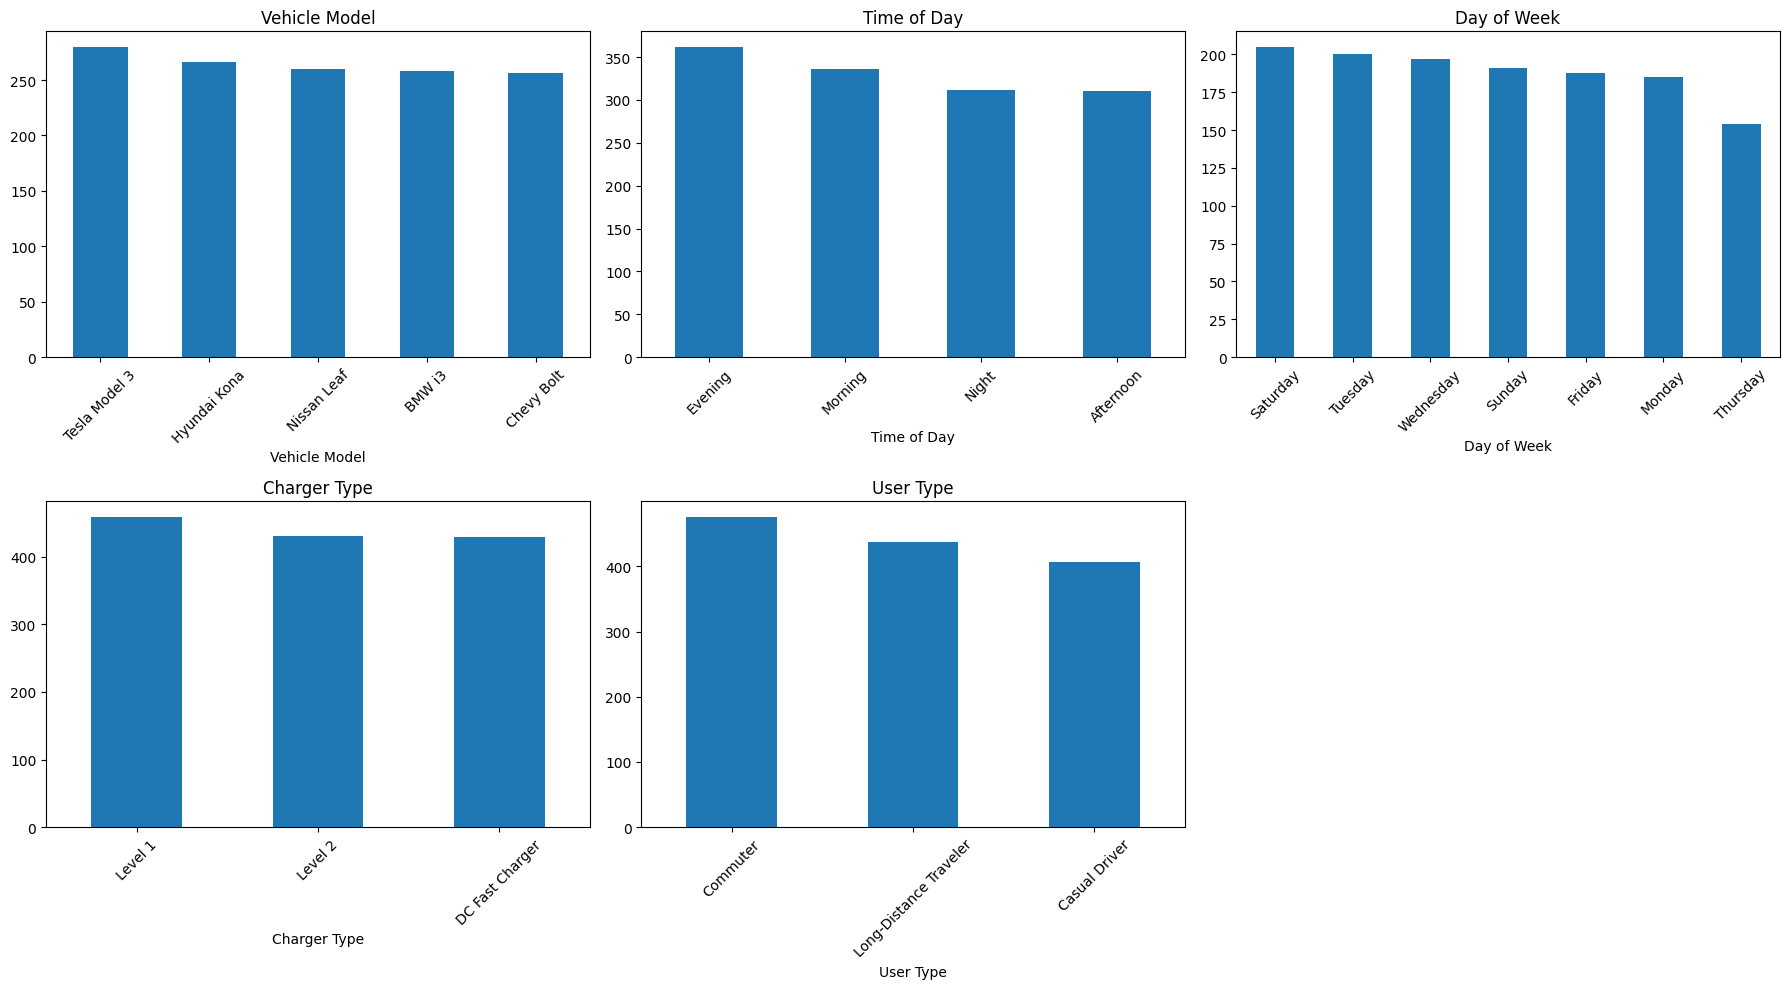

In [89]:
categorical_cols = [
    'Vehicle Model', 
    'Time of Day', 
    'Day of Week', 
    'Charger Type', 
    'User Type'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(categorical_cols):
    df[col].value_counts().plot(kind='bar', ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].tick_params(axis='x', rotation=45)

# completely remove the empty subplot on the bottom right
fig.delaxes(axes[1, 2])
plt.tight_layout()

Text(0.5, 0, 'Hour')

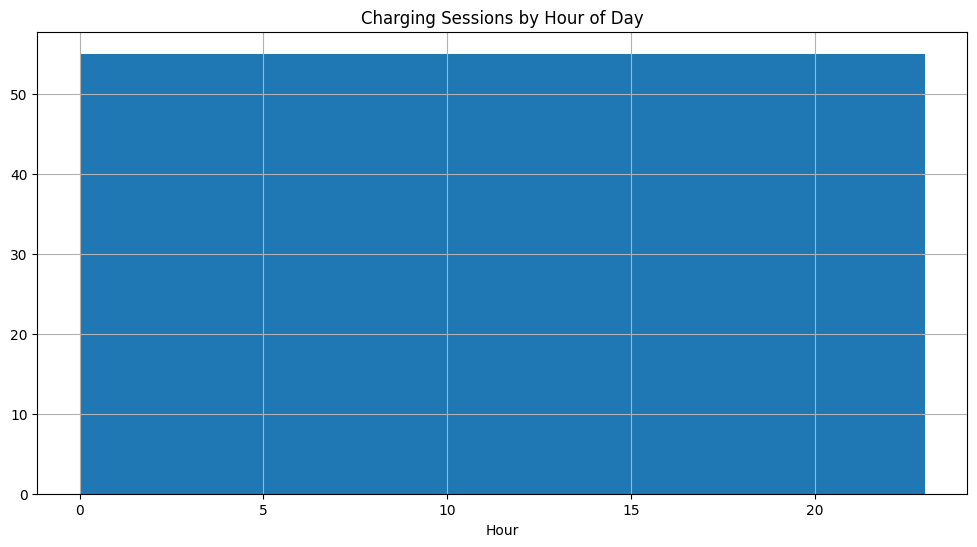

In [90]:
# Convert datetime columns first
df['Charging Start Time'] = pd.to_datetime(df['Charging Start Time'])
df['Charging End Time'] = pd.to_datetime(df['Charging End Time'])

# Charging patterns by hour
df['hour'] = df['Charging Start Time'].dt.hour
plt.figure(figsize=(12, 6))
df['hour'].hist(bins=24)
plt.title('Charging Sessions by Hour of Day')
plt.xlabel('Hour')

In [91]:
# Verify the exact counts
print(df['hour'].value_counts().sort_index())

# Also check the original 'Time of Day' column
print(df['Time of Day'].value_counts())

# Look at a few raw datetime values
print(df[['Charging Start Time', 'hour']].head(10))

hour
0     55
1     55
2     55
3     55
4     55
5     55
6     55
7     55
8     55
9     55
10    55
11    55
12    55
13    55
14    55
15    55
16    55
17    55
18    55
19    55
20    55
21    55
22    55
23    55
Name: count, dtype: int64
Time of Day
Evening      362
Morning      336
Night        312
Afternoon    310
Name: count, dtype: int64
  Charging Start Time  hour
0 2024-01-01 00:00:00     0
1 2024-01-01 01:00:00     1
2 2024-01-01 02:00:00     2
3 2024-01-01 03:00:00     3
4 2024-01-01 04:00:00     4
5 2024-01-01 05:00:00     5
6 2024-01-01 06:00:00     6
7 2024-01-01 07:00:00     7
8 2024-01-01 08:00:00     8
9 2024-01-01 09:00:00     9


In [92]:
print("Note: Temporal patterns show uniform distribution across hours,")
print("suggesting simulated data without realistic time-of-day effects")

Note: Temporal patterns show uniform distribution across hours,
suggesting simulated data without realistic time-of-day effects


Text(0.5, 1.0, 'Correlation Matrix of Numerical Variables')

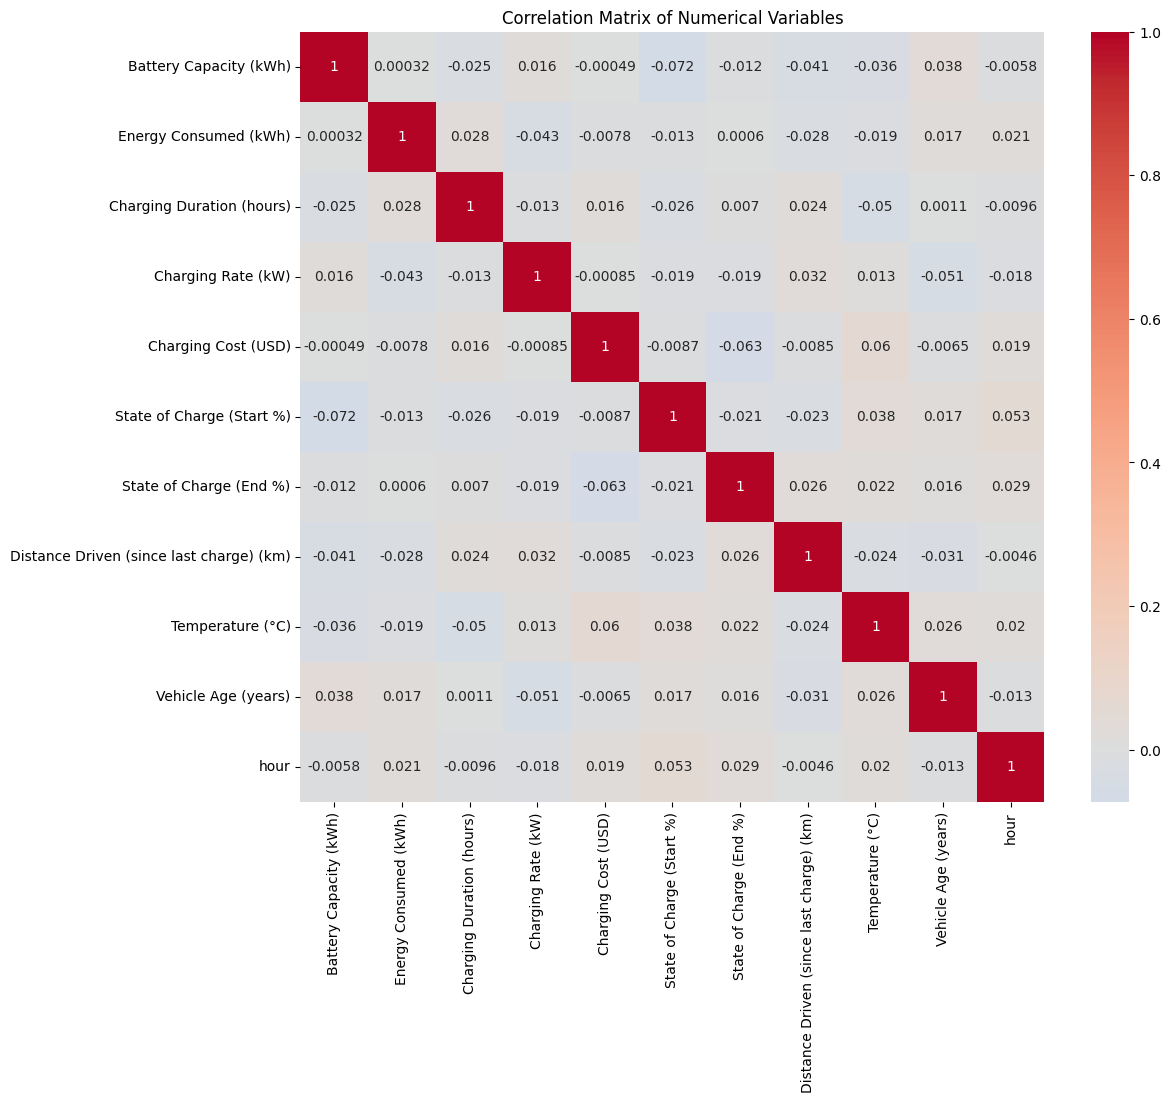

In [93]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')

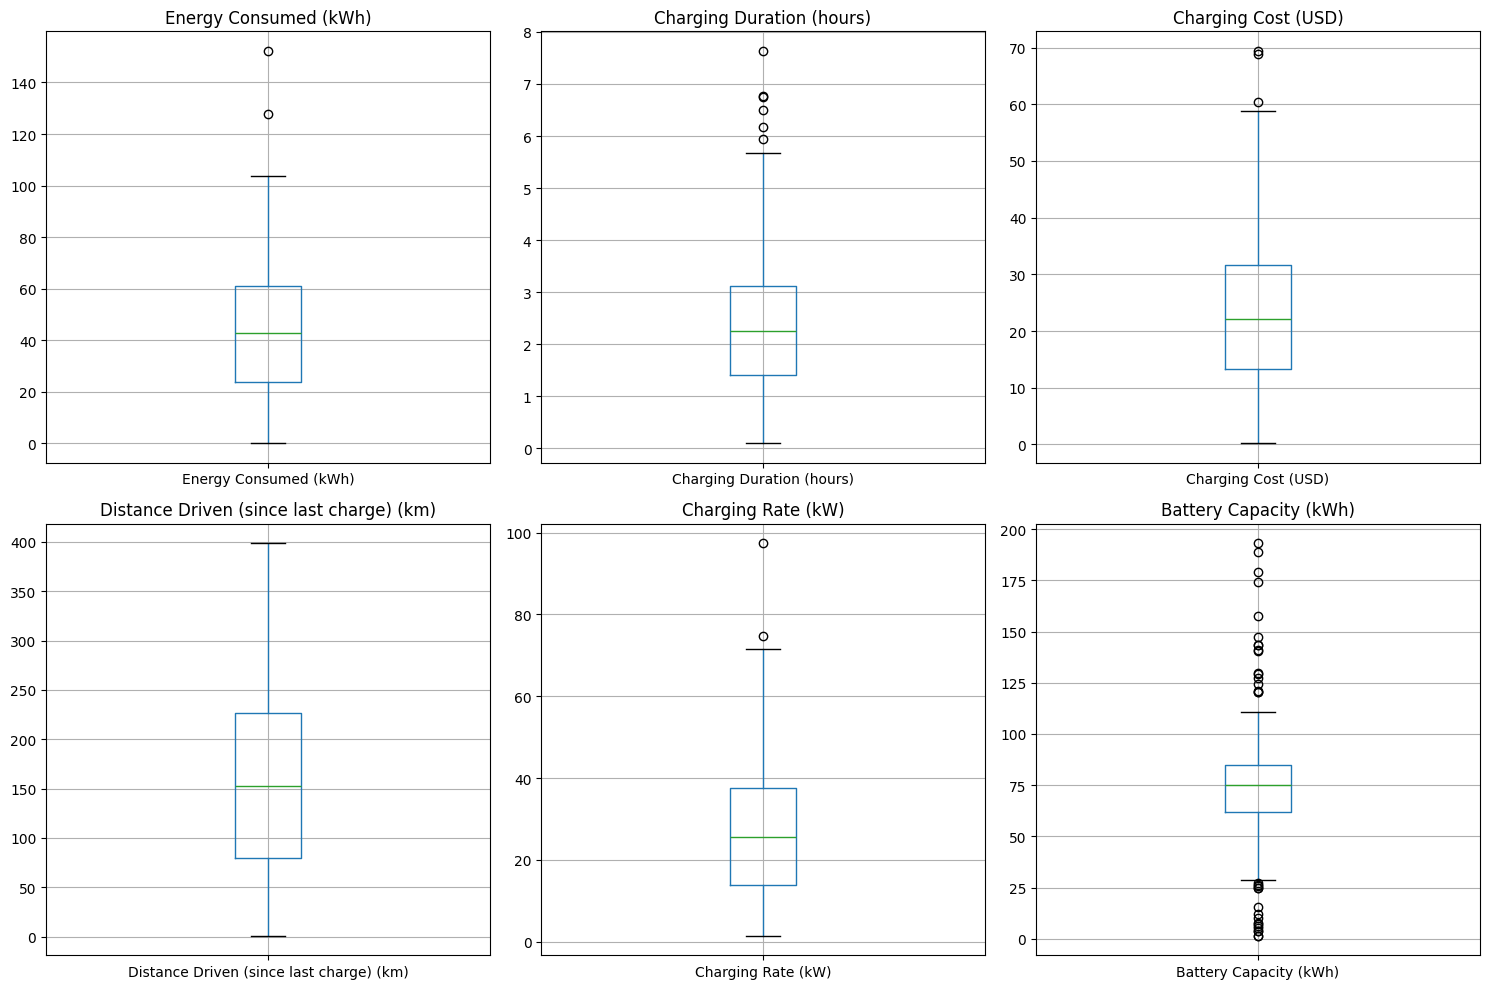

In [94]:
# Look for outliers in key variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
key_vars = ['Energy Consumed (kWh)', 'Charging Duration (hours)', 
           'Charging Cost (USD)', 'Distance Driven (since last charge) (km)',
           'Charging Rate (kW)', 'Battery Capacity (kWh)']

for i, col in enumerate(key_vars):
    df.boxplot(column=col, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
plt.tight_layout()

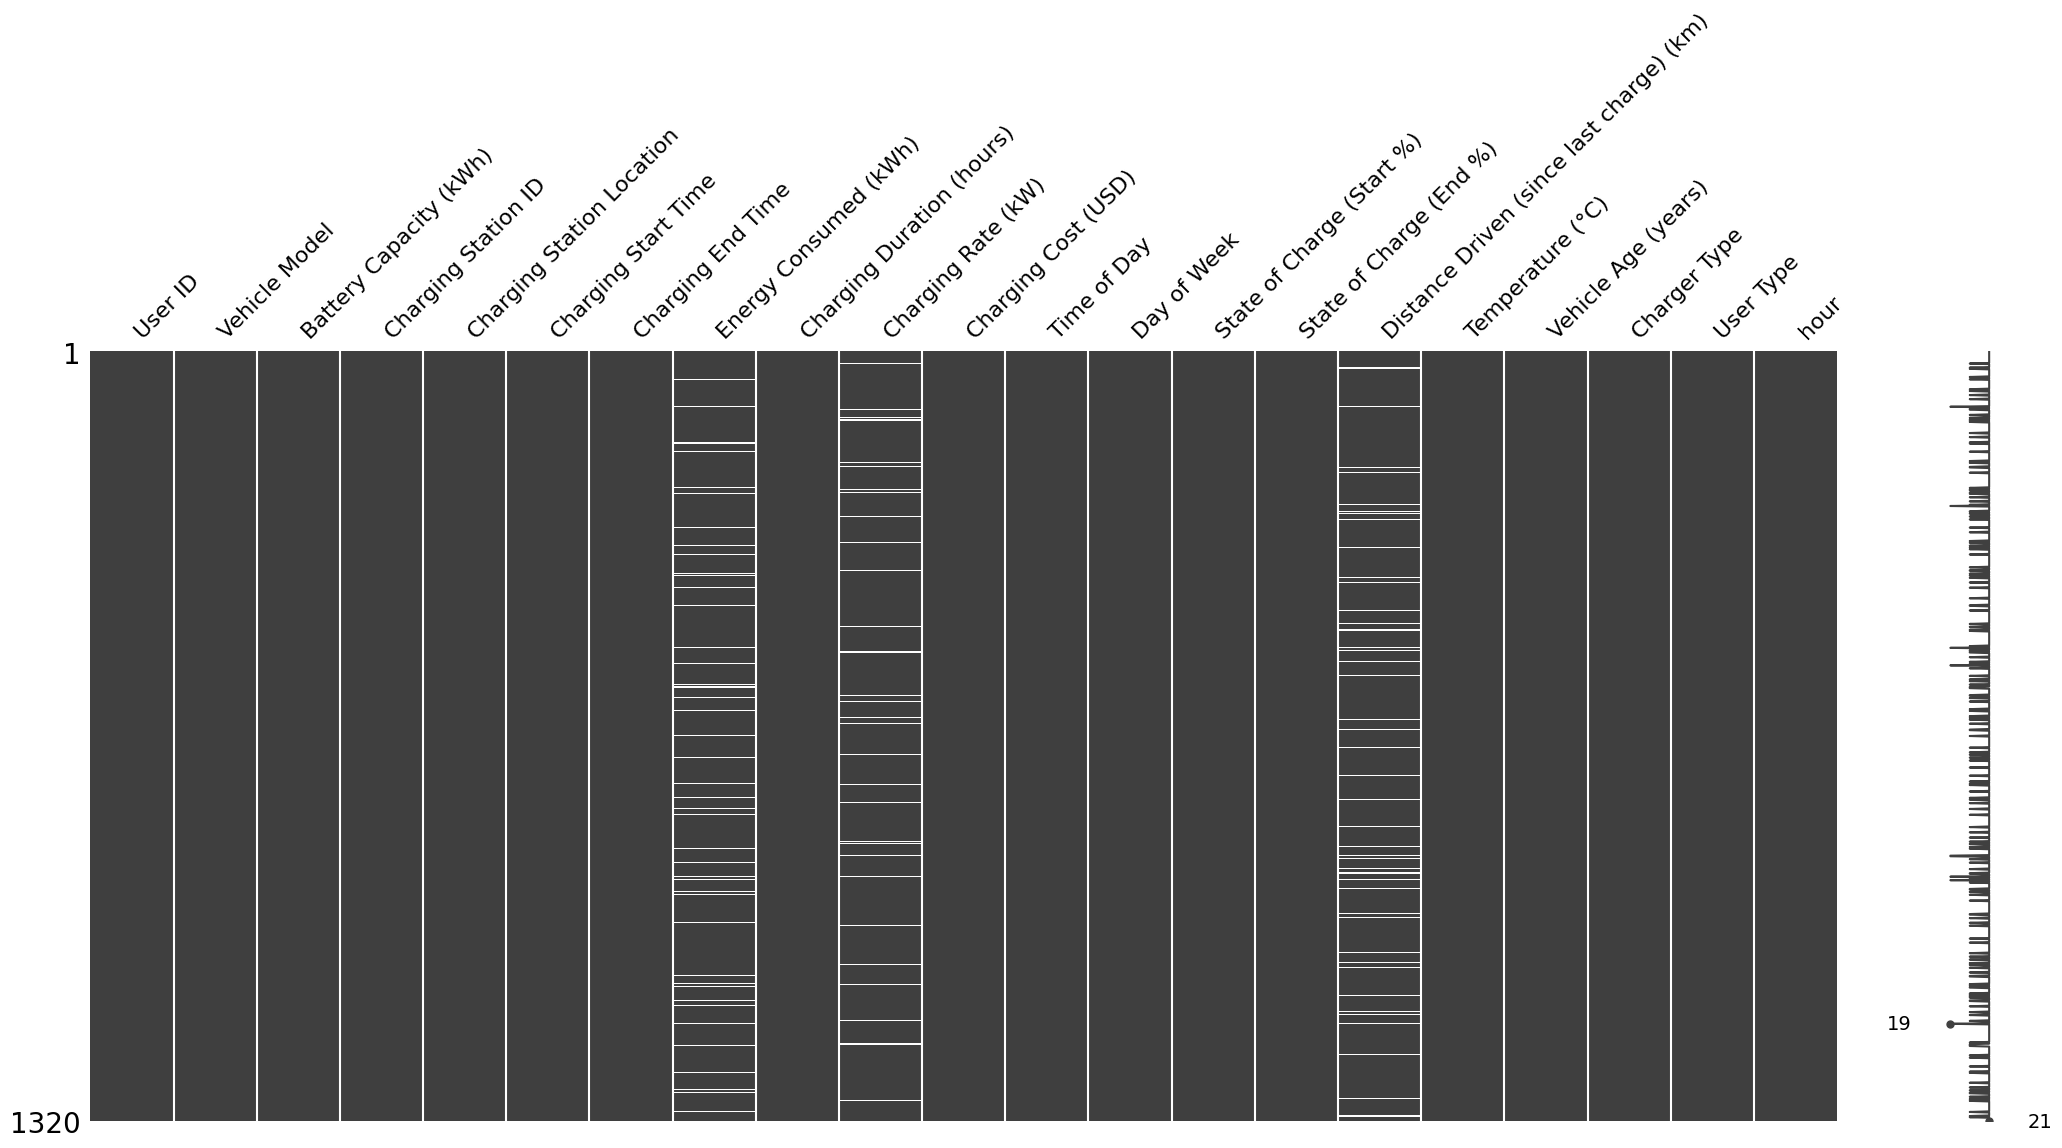

Missing values per column:
Energy Consumed (kWh)                       66
Charging Rate (kW)                          66
Distance Driven (since last charge) (km)    66
dtype: int64


In [102]:
# Even though you don't have many missing values, it's good practice
import missingno as msno  # pip install missingno

msno.matrix(df)
plt.show()

# Check patterns in missing data
missing_data = df.isnull().sum()
print("Missing values per column:")
print(missing_data[missing_data > 0])

In [103]:
# Check if the same rows are missing across these variables
missing_pattern = df[['Energy Consumed (kWh)', 'Charging Rate (kW)', 
                     'Distance Driven (since last charge) (km)']].isnull()

# Are the missing values in the same rows?
print("Missing values occur in same rows:", 
      missing_pattern.all(axis=1).sum())  # All three missing together

# Check characteristics of rows with missing data
missing_rows = df[df['Energy Consumed (kWh)'].isnull()]
complete_rows = df[df['Energy Consumed (kWh)'].notnull()]

print("Missing data by Charger Type:")
print(missing_rows['Charger Type'].value_counts())
print("\nMissing data by User Type:")
print(missing_rows['User Type'].value_counts())

Missing values occur in same rows: 0
Missing data by Charger Type:
Charger Type
DC Fast Charger    23
Level 1            22
Level 2            21
Name: count, dtype: int64

Missing data by User Type:
User Type
Commuter                  23
Long-Distance Traveler    22
Casual Driver             21
Name: count, dtype: int64


In [107]:
# Complete cases for energy analysis
complete_energy = df.dropna(subset=['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)'])
print(f"Analysis with {len(complete_energy)} complete cases out of {len(df)} total")

Analysis with 1131 complete cases out of 1320 total


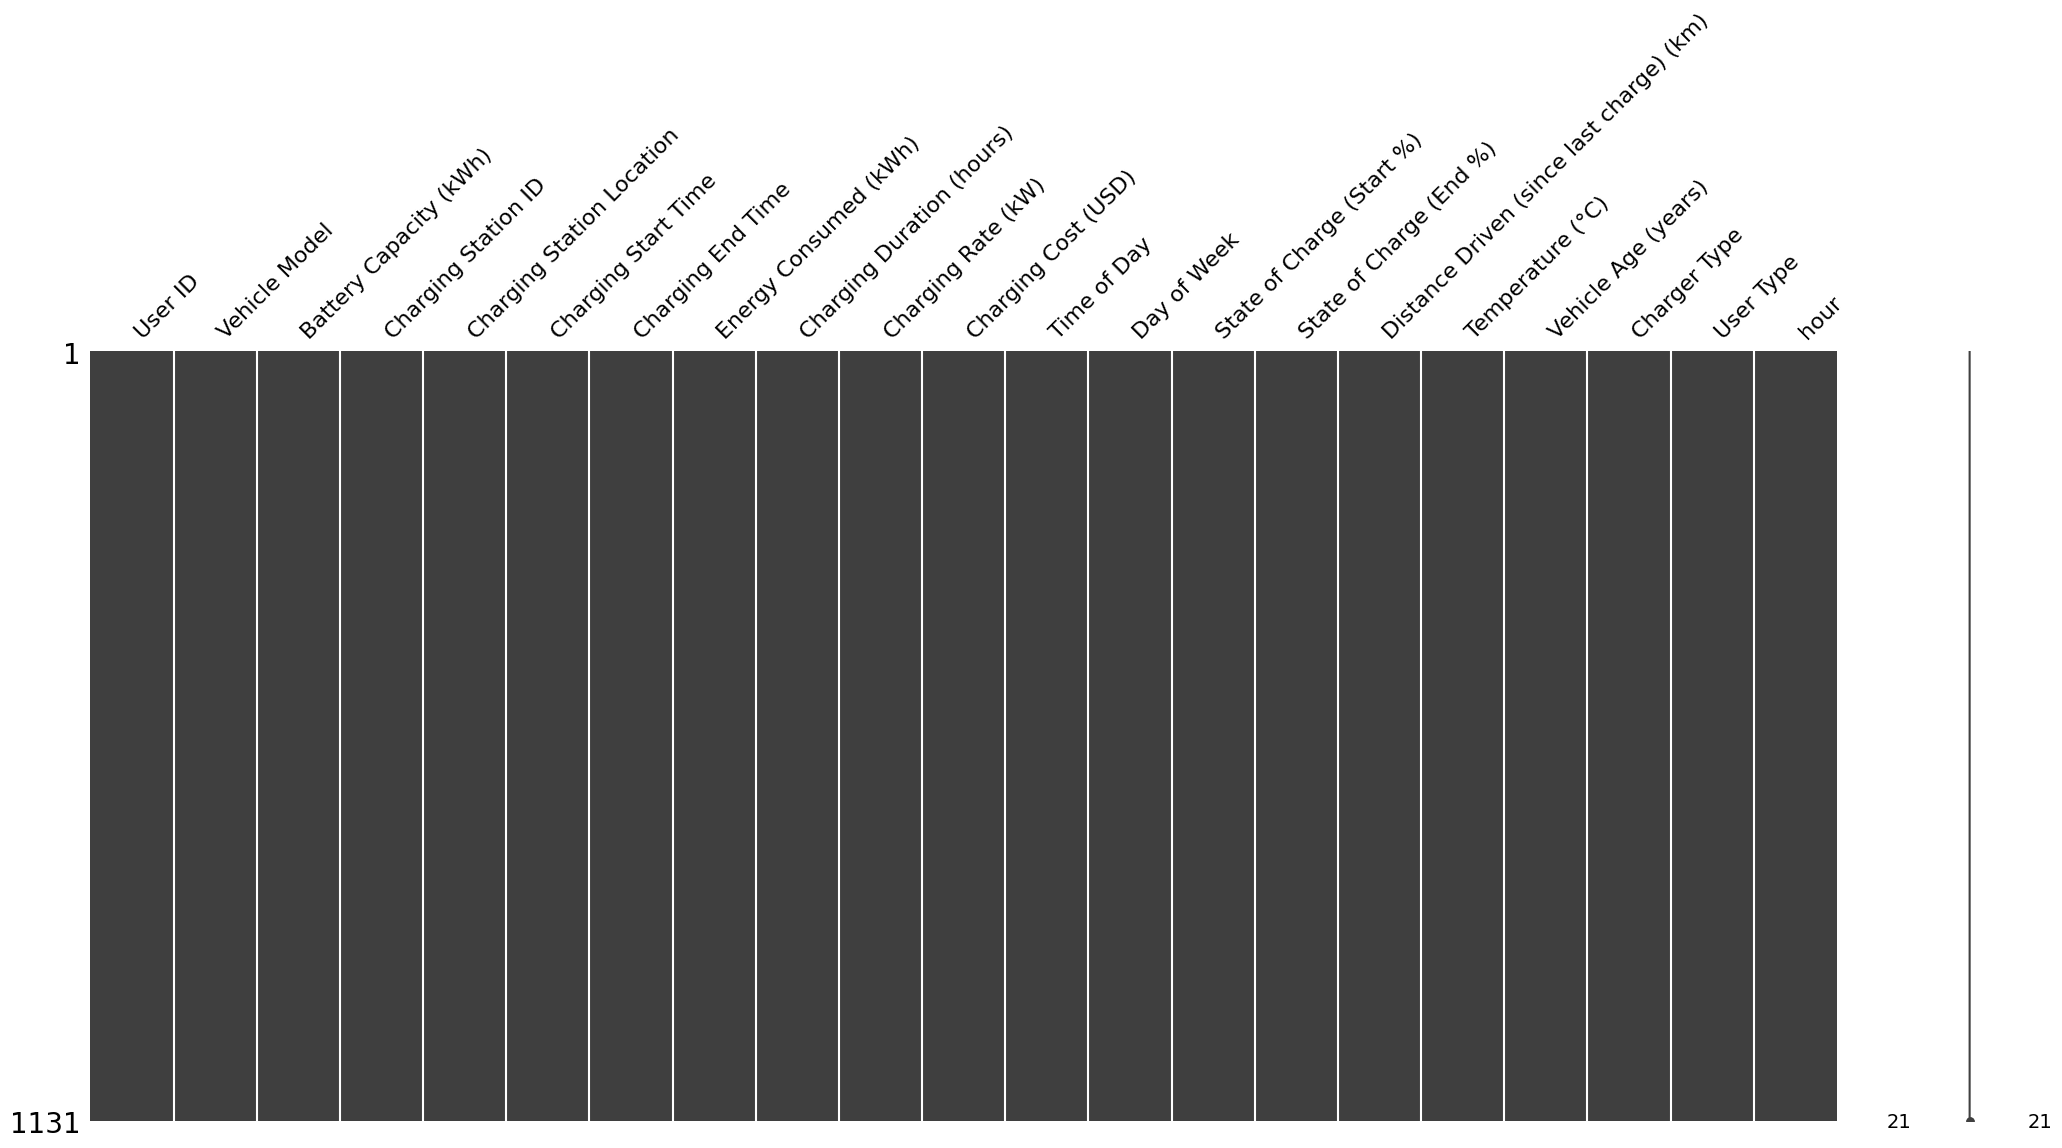

In [108]:
msno.matrix(complete_energy)
plt.show()

In [110]:
complete_energy.head(10)

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,hour
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.000000,DC Fast Charger,Commuter,0
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.000000,Level 1,Casual Driver,1
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.000000,Level 2,Commuter,2
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.000000,Level 1,Long-Distance Traveler,3
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.000000,Level 1,Long-Distance Traveler,4
5,User_6,Nissan Leaf,50.000000,Station_335,San Francisco,2024-01-01 05:00:00,2024-01-01 07:10:00,43.181137,1.167640,14.334523,36.900341,Evening,Saturday,75.217748,71.982288,143.680046,-5.274218,0.000000,DC Fast Charger,Long-Distance Traveler,5
6,User_7,Chevy Bolt,85.000000,Station_162,Houston,2024-01-01 06:00:00,2024-01-01 07:53:00,36.862140,3.539619,26.185188,22.214225,Evening,Friday,60.751781,70.796097,81.338009,27.551335,4.000000,Level 2,Commuter,6
7,User_8,Chevy Bolt,75.000000,Station_302,Los Angeles,2024-01-01 07:00:00,2024-01-01 10:42:00,51.467617,2.655396,26.702908,9.796821,Afternoon,Monday,56.201703,63.786815,116.543166,-4.417460,0.000000,Level 2,Long-Distance Traveler,7
8,User_9,Chevy Bolt,62.000000,Station_493,Los Angeles,2024-01-01 08:00:00,2024-01-01 09:21:00,43.592372,1.724204,14.294923,32.465005,Evening,Wednesday,33.466200,92.961421,208.259742,22.516706,4.000000,Level 1,Commuter,8
9,User_10,Hyundai Kona,50.000000,Station_452,Chicago,2024-01-01 09:00:00,2024-01-01 12:44:00,78.868607,2.026875,11.761000,21.312302,Morning,Wednesday,27.399455,70.053381,54.006309,27.512019,2.830381,DC Fast Charger,Commuter,9


In [113]:
complete_energy.to_csv('complete_df.csv')

In [114]:
df = pd.read_csv('/Users/chriskersov/Desktop/ev-charging-analysis/complete_df.csv')
df = df.drop(df.columns[0], axis=1)  
df.to_csv('complete_df.csv', index=False)